In [2]:
from Basics import *
setplot(dark=True)

import Measurements, SHMRs, HMFs, HODs, Profiles, SMFs, FFTs, ForwardModel

In [85]:
import pyccl as ccl

In [ ]:
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05,
                          h=0.7, n_s=0.95, sigma8=0.8,
                          transfer_function='bbks')

cosmo.halos.hmfunc.MassFuncTinker08()

AttributeError: 'Cosmology' object has no attribute 'halos'

In [96]:
cosmo

pyccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, n_s=0.95, sigma8=0.8, A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, T_CMB=None, bcm_log10Mc=14.079181246047625, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, extra_parameters=None, m_nu=0.0, m_nu_type=None, z_mg=None, df_mg=None, transfer_function='bbks', matter_power_spectrum='halofit', baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', emulator_neutrinos='strict')

# Stellar-Halo Mass Relations

In [ ]:
# del sys.modules['SHMRs']  # Clear the cache to avoid conflicts
# import SHMRs

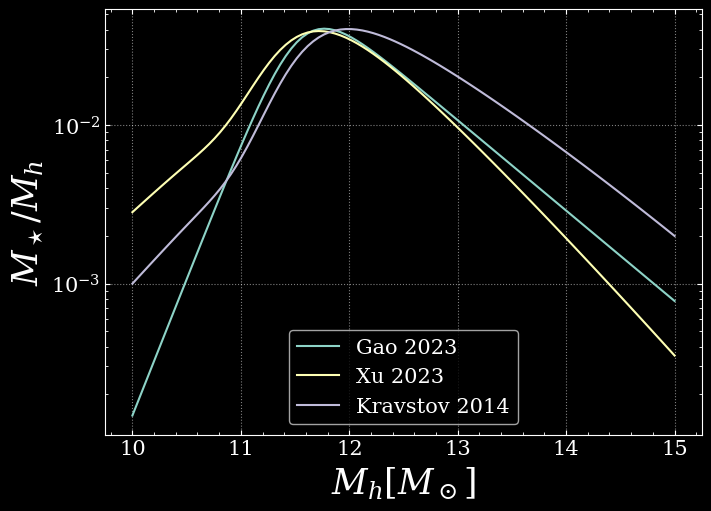

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), layout='constrained')
ax.set(ylabel=r'$M_\star / M_h$', xlabel=r'$M_h [M_\odot]$', yscale='log')

mhalos = np.logspace(10, 15, 100)
Xu = SHMRs.Xu2023('Main_BP13')
ax.plot(np.log10(mhalos), Xu.HSMR(mhalos)/mhalos, label='Xu 2023')
Gao = SHMRs.Gao2023("ELG_Auto")
ax.plot(np.log10(mhalos), Gao.HSMR(mhalos)/mhalos, label='Gao 2023')
Kravstov = SHMRs.Kravstov2014('Mvir')
ax.plot(np.log10(mhalos), Kravstov.HSMR(mhalos)/mhalos, label='Kravstov 2014')

ax.legend(); plt.show()

# Halo Occupancy Distributions

In [57]:
del sys.modules['HODs']  # Clear the cache to avoid conflicts
import HODs

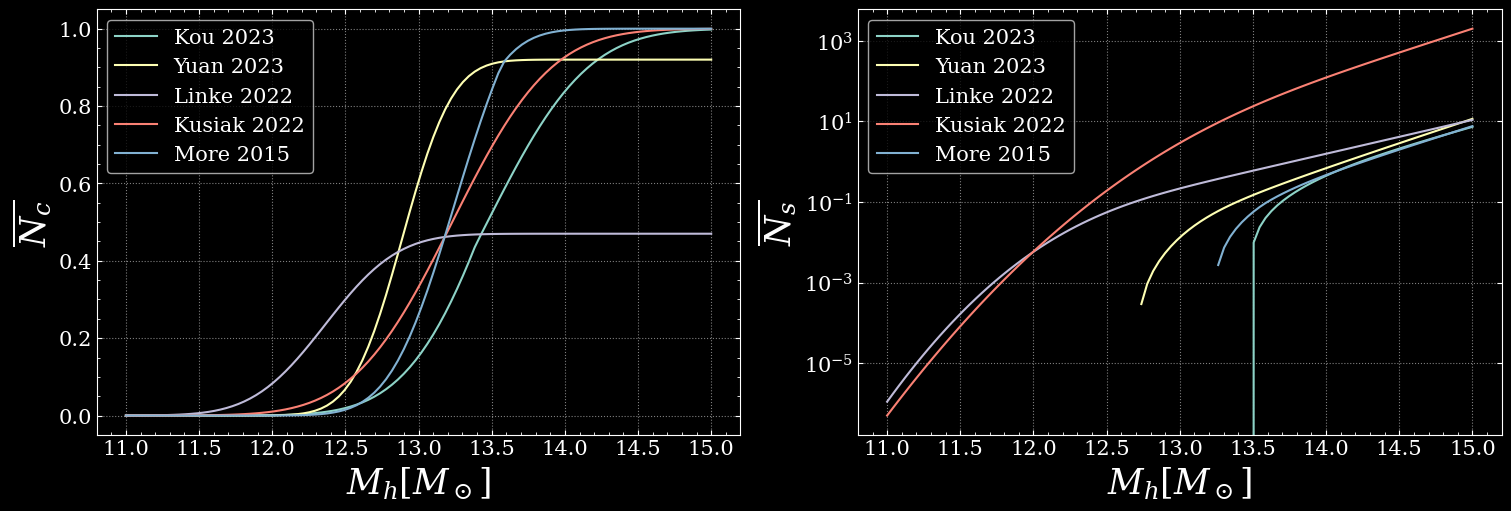

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(ylabel=r'$\overline{N_c}$', xlabel=r'$M_h [M_\odot]$')
axs[1].set(ylabel=r'$\overline{N_s}$', xlabel=r'$M_h [M_\odot]$', yscale='log')

mhalos = np.logspace(11, 15, 100)
Kou = HODs.Kou2023('M*>10.8')
axs[0].plot(np.log10(mhalos), Kou.Nc(mhalos), label='Kou 2023')
axs[1].plot(np.log10(mhalos), Kou.Ns(mhalos), label='Kou 2023')
Yuan = HODs.Yuan2023("LRG 0.4<z<0.6")
axs[0].plot(np.log10(mhalos), Yuan.Nc(mhalos), label='Yuan 2023')
axs[1].plot(np.log10(mhalos), Yuan.Ns(mhalos), label='Yuan 2023')
Linke = HODs.Linke2022('MS red')
axs[0].plot(np.log10(mhalos), Linke.Nc(mhalos), label='Linke 2022')
axs[1].plot(np.log10(mhalos), Linke.Ns(mhalos), label='Linke 2022')
Kusiak = HODs.Kusiak2022('Red')
axs[0].plot(np.log10(mhalos), Kusiak.Nc(mhalos), label='Kusiak 2022')
axs[1].plot(np.log10(mhalos), Kusiak.Ns(mhalos), label='Kusiak 2022')
More = HODs.More2015('[11.10, 12.00]')
axs[0].plot(np.log10(mhalos), More.Nc(mhalos), label='More 2015')
axs[1].plot(np.log10(mhalos), More.Ns(mhalos), label='More 2015')

axs[0].legend(), axs[1].legend(); plt.show()

# Profiles

In [78]:
del sys.modules['Profiles']  # Clear the cache to avoid conflicts
import Profiles

In [64]:
initpar = {"hh": 0.7, "Omega_L":0.7, "Omega_m":0.3, "Omega_b": 0.044, "XH": 0.76}

cosmology = astropy.cosmology.LambdaCDM(H0=initpar["hh"]*100, Tcmb0=2.726, Om0=initpar["Omega_m"], Ode0=initpar["Omega_L"], Ob0=initpar["Omega_b"])
H_func = lambda z: cosmology.H(z).to(u.km/u.s/u.Mpc).value
rhoc_func = lambda z: cosmology.critical_density(z).to(u.Msun/u.Mpc**3).value
dA_func = lambda z: cosmology.angular_diameter_distance(z).value
r200c_func = lambda m200c, z: (m200c/(4/3*np.pi*200*rhoc_func(z)))**(1/3)

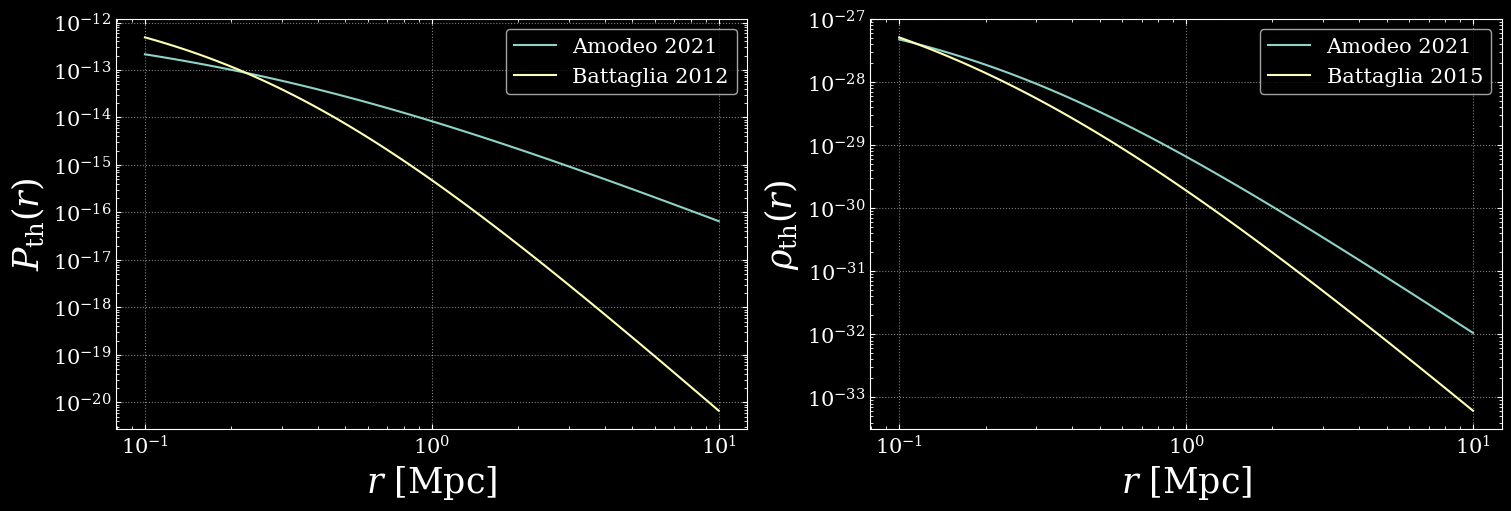

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(ylabel=r'$P_\text{th}(r)$', xlabel=r'$r$ [Mpc]')
axs[1].set(ylabel=r'$\rho_\text{th}(r)$', xlabel=r'$r$ [Mpc]')

rs = np.logspace(-1, 1, 100)
mhalos = np.logspace(11, 15, 50)
zs = np.linspace(0.4, 1.0, 10)

AmodeoPth = Profiles.Amodeo2021('GNFW').Pth1h(rs, mhalos, zs, rhoc_func, r200c_func, initpar)
Amodeorho = Profiles.Amodeo2021('GNFW').rho1h(rs, mhalos, zs, rhoc_func, r200c_func, initpar)
axs[0].loglog(rs, AmodeoPth()[:, 25, 5], label='Amodeo 2021')
axs[1].loglog(rs, Amodeorho()[:, 25, 5], label='Amodeo 2021')
Battaglia2015 = Profiles.Battaglia2015('AGN').rho1h(rs, mhalos, zs, rhoc_func, r200c_func, initpar)
axs[1].loglog(rs, Battaglia2015()[:, 25, 5], label='Battaglia 2015')
Battaglia2012 = Profiles.Battaglia2012('B12').Pth1h(rs, mhalos, zs, rhoc_func, r200c_func, initpar)
axs[0].loglog(rs, Battaglia2012()[:, 25, 5], label='Battaglia 2012')


axs[0].legend(), axs[1].legend(); plt.show()


# Measurements

In [8]:
del sys.modules['Measurements']  # Clear the cache to avoid conflicts
import Measurements

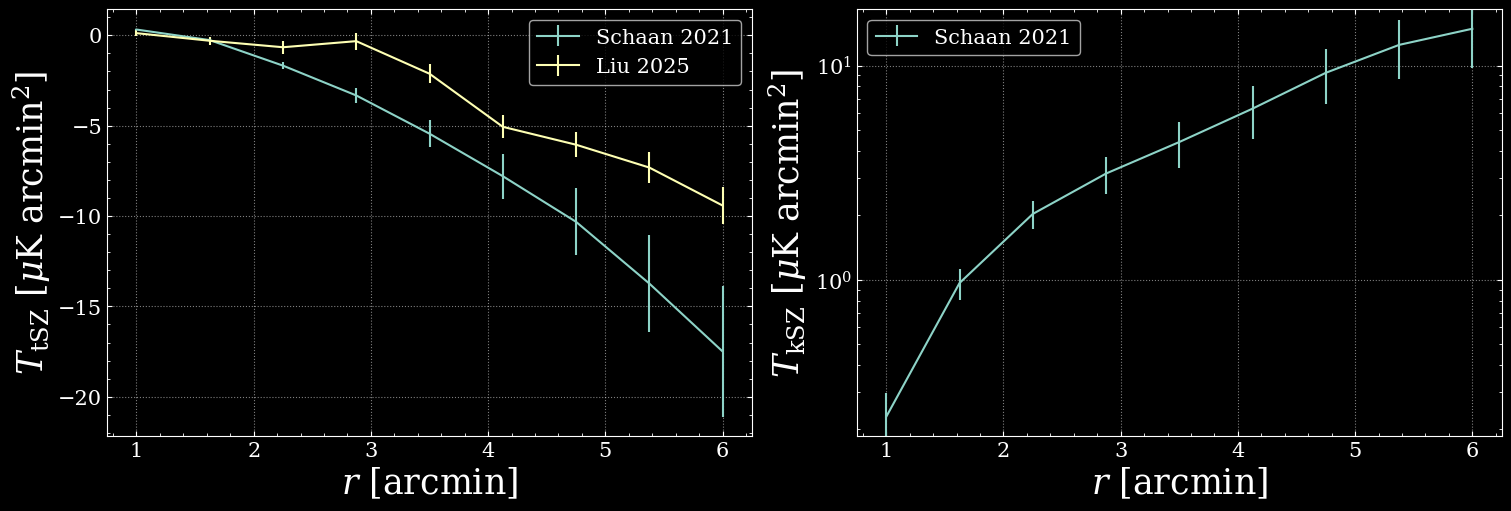

In [2]:
Schaan2021 = Measurements.Schaan2021()
Liu2025 = Measurements.Liu2025(bin='pz2', dBeta='dBeta_1.2_10.7')
Liu2025.tSZdata_in_muK(T_CMB=2.725)


fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].set(xlabel=r'$r$ [arcmin]', ylabel=r'$T_\text{tSZ}$ [$\mu$K arcmin$^2$]')
axs[0].errorbar(Schaan2021.thetas, Schaan2021.tSZdata, Schaan2021.tSZerr, label='Schaan 2021')
axs[0].errorbar(Liu2025.thetas, Liu2025.tSZdata, Liu2025.tSZerr, label='Liu 2025')

axs[1].set(xlabel=r'$r$ [arcmin]', ylabel=r'$T_\text{kSZ}$ [$\mu$K arcmin$^2$]', yscale='log')
axs[1].errorbar(Schaan2021.thetas, Schaan2021.kSZdata, Schaan2021.kSZerr, label='Schaan 2021')


axs[0].legend(), axs[1].legend(); plt.show()

# Stellar Mass Functions

In [5]:
del sys.modules['SMFs']  # Clear the cache to avoid conflicts
import SMFs

In [13]:
thing=np.log10(np.genfromtxt('/global/homes/c/cpopik/Capybara/Data/mass_distrib.txt'))

In [ ]:
np.arange(11.2, 15.7, 0.1)

array([11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2,
       12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3,
       13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4,
       14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5])

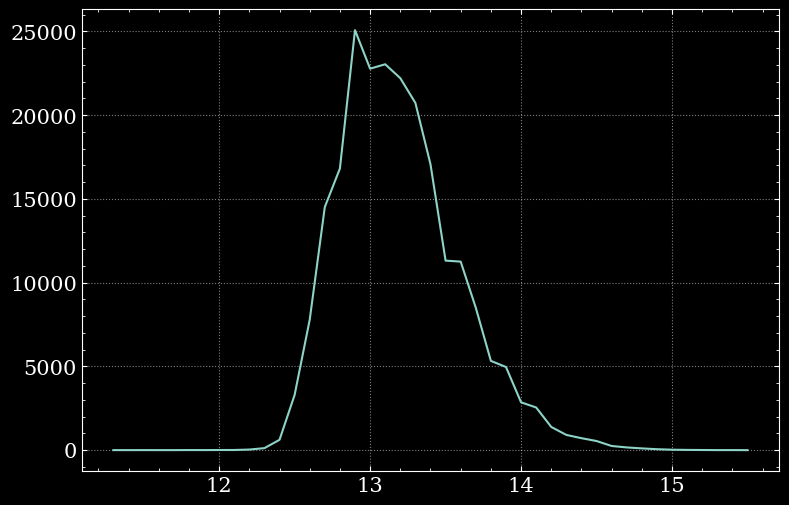

In [24]:
t1, t2 = np.histogram(thing, bins=np.arange(11.2, 15.6, 0.1))
plt.plot(t2[1:], t1)

In [ ]:
https://data.desi.lbl.gov/public/ets/vac/stellar_mass/v1/


In [40]:
ViewDataOrganization("/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/")

### arXiv:2208.08515                  DESI LRG target selection    (Zhou+, 2022)
Target Selection and Validation of DESI Luminous Red Galaxies
    Rongpu Zhou, Biprateep Dey, Jeffrey A. Newman, D. J. Eisenstein, K. Dawson,
    S. Bailey, A. Berti, J. Guy, Ting-Wen Lan, H. Zou, J. Aguilar, S. Ahlen,
    Shadab Alam, D. Brooks, A. de la Macorra, A. Dey, G. Dhungana, K. Fanning,
    A. Font-Ribera, S. Gontcho A Gontcho, K. Honscheid, Mustapha Ishak,
    T. Kisner, A. Kovacs, A. Kremin, M. Landriau, Michael E. Levi,
    C. Magneville, Marc Manera, P. Martini, Aaron M. Meisner, R. Miquel,
    J. Moustakas, Adam D. Myers, Jundan Nie, N. Palanque-Delabrouille,
    W.J. Percival, C. Poppett, F. Prada, A. Raichoor, A. J. Ross, E. Schlafly,
    D. Schlegel, M. Schubnell, Gregory Tarle, B. A. Weaver, R. H. Wechsler,
    Christophe Yèche, Zhimin Zhou

This directory contains the stellar mass catalogs. These catalogs are row-by-row
matched to the sweep catalogs in Legacy Surveys DR9 (https://www.le

In [39]:
Table.read("/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/south/sweep-180p030-190p035-stellar-mass.fits.gz").to_pandas()

,RELEASE,BRICKID,OBJID,STELLAR_MASS
0,9010,518295,0,-99.000000
1,9010,518295,1,7.537301
2,9010,518295,2,-99.000000
3,9010,518295,3,11.047691
4,9010,518295,4,-99.000000
...,...,...,...,...
2861650,9010,513493,4691,-99.000000
2861651,9010,513493,4692,10.627125
2861652,9010,513493,4693,-99.000000
2861653,9010,513493,4694,6.543111


In [43]:
len(os.listdir("/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/south/"))

456

In [42]:
tables = []
for sweep in os.listdir("/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/south/"):
    tables.append(Table.read("/global/cfs/projectdirs/desi/public/ets/vac/stellar_mass/v1/south/sweep-180p030-190p035-stellar-mass.fits.gz").to_pandas())
    
masses = pd.concat(tables)

BadGzipFile: CRC check failed 0x754d2a70 != 0x613cb8c2

In [23]:
t1

array([    1,     1,     2,     1,     1,     5,     3,     8,     9,
          35,   119,   617,  3292,  7784, 14518, 16816, 25080, 22779,
       23042, 22212, 20733, 17070, 11317, 11257,  8506,  5330,  4966,
        2855,  2547,  1384,   908,   714,   544,   248,   162,   104,
          56,    26,    14,     8,     2,     3,     0])

/global/u2/c/cpopik/Capybara/SMFs.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self.SMF = self.SMF_unweighted*self.zdistdf.groupby('zbin')[f"{bin}_{hemisphere}"].sum().values/np.trapz(self.SMF_unweighted, self.mstars, axis=0)


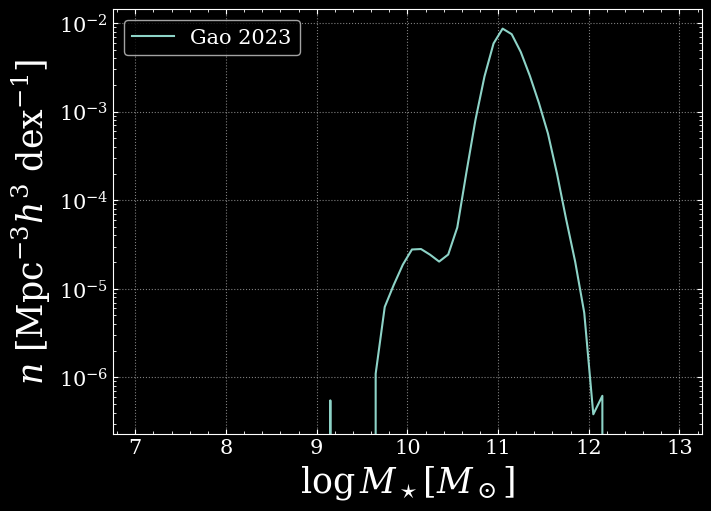

In [32]:
DESILRGs = SMFs.Gao2023(bin='bin_1', hemisphere='south')
DR10CMASS = SMFs.DR10CMASS('portsmouth', 'passive', 'krou')

fig, ax = plt.subplots(1, 1, figsize=(7, 5), layout='constrained')
ax.set(xlabel=r'$\log M_\star [M_\odot]$', ylabel=r'$n$ [Mpc$^{-3} h^3$ dex$^{-1}$]', yscale='log')

ax.plot(np.log10(DESILRGs.mstars), np.sum(DESILRGs.SMF_LRG, axis=1), label='Gao 2023')
# plt.loglog(DR10CMASS.mstars, np.sum(DR10CMASS.SMF, axis=1), label='')

ax.legend(); plt.show()

# Stellar Halo Mass Relations

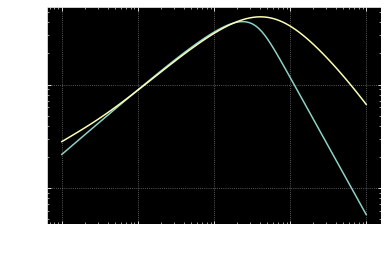

In [ ]:
Gao2023 = SHMRs.Gao2023(sample='ELG_Auto')
Kravstov2018 = SHMRs.Kravstov2018(sample='M200c')

mstars = np.logspace(8, 12, 100)
plt.loglog(mstars, mstars/Gao2023.SHMR(mstars)())
plt.loglog(mstars, mstars/Kravstov2018.SHMR(mstars)())

# Halo Occupancy Distributions

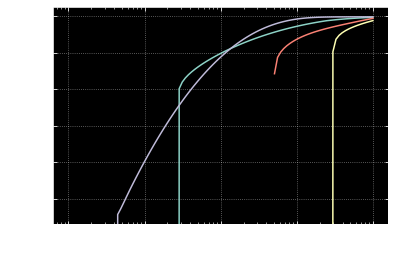

In [75]:
Kou2023 = HODs.Kou2023(sample="M*>10.8")
Yuan2023 = HODs.Yuan2023(sample="LRG 0.4<z<0.6")

mhalos = np.logspace(10, 14, 100)
plt.loglog(mhalos, Kou2023.Nc(mhalos)())
plt.loglog(mhalos, Kou2023.Ns(mhalos)())

plt.loglog(mhalos, Yuan2023.Nc(mhalos)())
plt.loglog(mhalos, Yuan2023.Ns(mhalos)())

# Halo Mass Functions

# Profiles

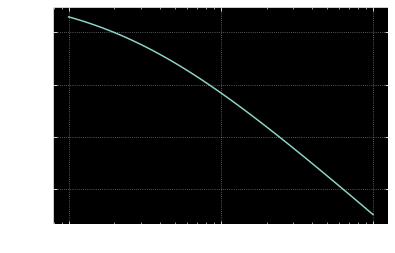

In [84]:
PthB12 = Profiles.PthB12('B12')

cosmopars = {'Omega_m': 0.3, 'Omega_b': 0.044, 'XH': 0.76}
cosmology = astropy.cosmology.LambdaCDM(H0=100*0.7, Tcmb0=2.726, Om0=0.3, Ode0=0.7, Ob0=0.044)
rhoc_func = lambda z: cosmology.critical_density(z).to(u.Msun/u.Mpc**3).value
r200c_func = lambda m200c, z: (m200c/(4/3*np.pi*200*rhoc_func(z)))**(1/3)

rs = np.logspace(-1, 1, 100)
ms = np.logspace(12, 14, 50)
zs = np.linspace(0.4, 1.1, 10)
plt.loglog(rs, PthB12.Pth1h(rs, m200c=ms, z=zs, rhocrit_func=rhoc_func, r200c_func=r200c_func, cosmopars=cosmopars)()[:, 25, 2])

In [72]:
del sys.modules['HODs']  # Clear the cache to avoid conflicts
import HODs